In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode
from torch.utils.data import DataLoader
import numpy as np

In [2]:
import torch
import torchvision
import torch.nn as nn

pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Change the classifier head to match with binary classification:
# {distracted_driver, non_distracted_driver}
pretrained_vit.heads = nn.Linear(in_features=768, out_features=2)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

In [3]:
import torch
import torchvision
import torch.nn as nn

pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# Change the classifier head to match with binary classification:
# {distracted_driver, non_distracted_driver}
pretrained_vit.heads = nn.Linear(in_features=768, out_features=2)
pretrained_vit_transforms = pretrained_vit_weights.transforms()

In [4]:
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [7]:
kir_test_dir = "/net/polaris/storage/deeplearning/sur_data/binary_kinect_ir_daa/split_0/test"

In [10]:
# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor before other tensor ops
])


In [11]:
dataset = datasets.ImageFolder(root=kir_test_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0) 

In [12]:
# Visualizing some images
dataiter = iter(dataloader)
images, labels = next(dataiter)

In [13]:
images.shape

torch.Size([4, 3, 424, 512])

In [17]:
nir_test_dir = "/net/polaris/storage/deeplearning/sur_data/binary_nir_ftop_daa/split_0/test"

nir_dataset = datasets.ImageFolder(root=nir_test_dir, transform=transform)
nir_dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Visualizing some images
nir_dataiter = iter(nir_dataloader)
nir_images, nir_labels = next(nir_dataiter)

In [15]:
nir_images.shape

torch.Size([4, 3, 424, 512])

In [20]:
from PIL import Image

# Path to the image
img_path = "/net/polaris/storage/deeplearning/sur_data/binary_nir_ftop_daa/split_0/test/distracted/img_100375.png"

# Open the image
img = Image.open(img_path)

# Display the image (optional, if you want to see it)
img.show()

# Check the mode of the image to determine if it's grayscale or RGB
if img.mode == 'RGB':
    print("This is an RGB image.")
elif img.mode == 'L':
    print("This is a grayscale image.")
else:
    print("This image has a different mode:", img.mode)

# Get the number of channels
channels = len(img.getbands())
print(f"The image has {channels} channels.")


This is an RGB image.
The image has 3 channels.


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [21]:
# Display the image (optional, if you want to see it)
img.show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [23]:
from PIL import Image

# Path to the image
img_path = "/net/polaris/storage/deeplearning/sur_data/binary_nir_ftop_daa/split_0/test/distracted/img_100375.png"

# Open the image
img = Image.open(img_path)

# Check the mode of the image to determine if it's grayscale or RGB
if img.mode == 'RGB':
    print("This is an RGB image.")
elif img.mode == 'L':
    print("This is a grayscale image.")
else:
    print("This image has a different mode:", img.mode)

# Get the number of channels
channels = len(img.getbands())
print(f"The image has {channels} channels.")


This is an RGB image.
The image has 3 channels.


# So, The NIR and Kinect IR images are already having three gray scale channels.

In [26]:
import numpy as np
from PIL import Image

# Load the image
img_path = "/net/polaris/storage/deeplearning/sur_data/binary_nir_ftop_daa/split_0/test/distracted/img_100375.png"
img = Image.open(img_path)

# Convert the image to an array
img_array = np.array(img)

if img_array.ndim == 3:  # Check if the image has multiple channels
    # Check if all channels are the same
    if np.array_equal(img_array[:,:,0], img_array[:,:,1]) and np.array_equal(img_array[:,:,1], img_array[:,:,2]):
        print("All channels contain the same data.")
    else:
        print("Channels contain different data.")
else:
    print("This image does not have multiple channels.")


All channels contain the same data.


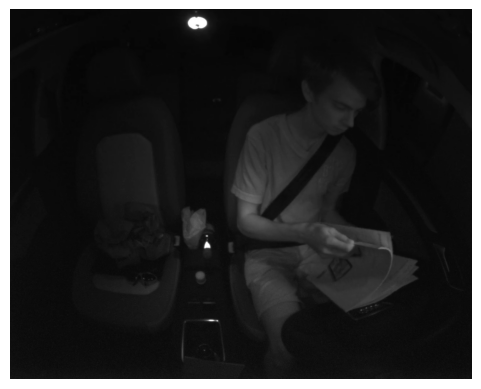

In [25]:
import matplotlib.pyplot as plt
# Plot the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Verification for the KIR data

This is an RGB mode compatible Gray scale image with 3 channels.
The image has 3 channels.
All channels contain the same data.


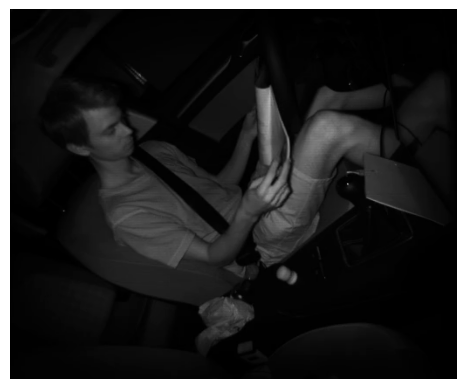

In [29]:
kir_test_img = "/net/polaris/storage/deeplearning/sur_data/binary_kinect_ir_daa/split_0/test/distracted/img_059400.png"

img = Image.open(kir_test_img)

# Convert the image to an array
img_array = np.array(img)

# Check the mode of the image to determine if it's grayscale or RGB
if img.mode == 'RGB':
    print("This is an RGB mode compatible Gray scale image with 3 channels.")
elif img.mode == 'L':
    print("This is a grayscale image.")
else:
    print("This image has a different mode:", img.mode)

# Get the number of channels
channels = len(img.getbands())
print(f"The image has {channels} channels.")

if img_array.ndim == 3:  # Check if the image has multiple channels
    # Check if all channels are the same
    if np.array_equal(img_array[:,:,0], img_array[:,:,1]) and np.array_equal(img_array[:,:,1], img_array[:,:,2]):
        print("All channels contain the same data.")
    else:
        print("Channels contain different data.")
else:
    print("This image does not have multiple channels.")

import matplotlib.pyplot as plt
# Plot the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

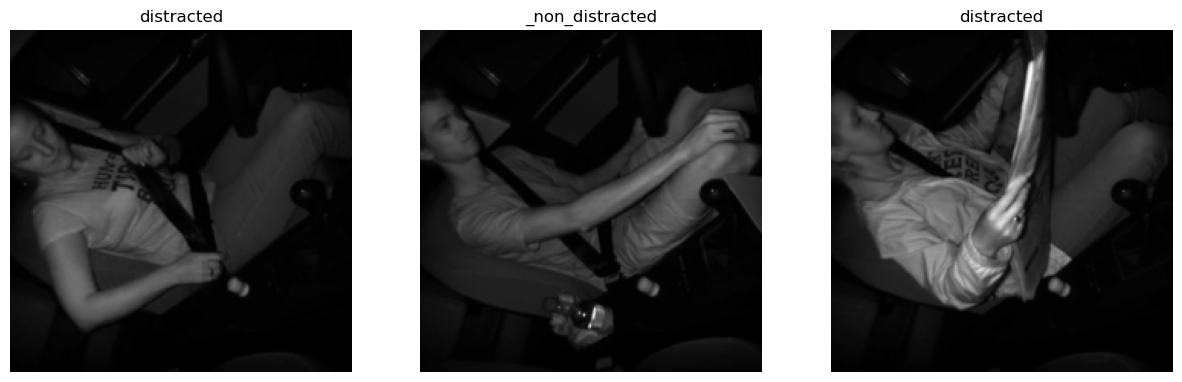

In [30]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np

# Set transformation parameters
crop_size = 224
resize_size = 256
mean = [0.485, 0.485, 0.485]  # Uniform mean across channels
std = [0.229, 0.229, 0.229]   # Uniform std deviation across channels
interpolation = InterpolationMode.BILINEAR

# Define the transformations
transform = transforms.Compose([
    transforms.Resize(resize_size, interpolation=interpolation),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),  # Convert image to tensor before other tensor ops
    transforms.Lambda(lambda x: x if x.size(0) == 3 else x.repeat(3, 1, 1)),  # Conditionally repeat the grayscale channel
    transforms.Normalize(mean=mean, std=std),
    transforms.Lambda(lambda x: x if x.size(0) == 3 else torch.tensor([[],[],[]])) # Check for channel size
])

dataset_path = kir_test_dir

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True, num_workers=0)  # Reduce num_workers for debugging

# Function to plot images
def plot_images(images, labels):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, labels)):
        img = img.numpy().transpose((1, 2, 0))
        img = img * std + mean  # Unnormalize the image using adjusted mean/std for grayscale
        img = np.clip(img, 0, 1)
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

# Visualizing some images
dataiter = iter(dataloader)
images, labels = next(dataiter)
# Convert labels to class names
class_names = dataset.classes
labels = [class_names[label] for label in labels]
plot_images(images, labels)


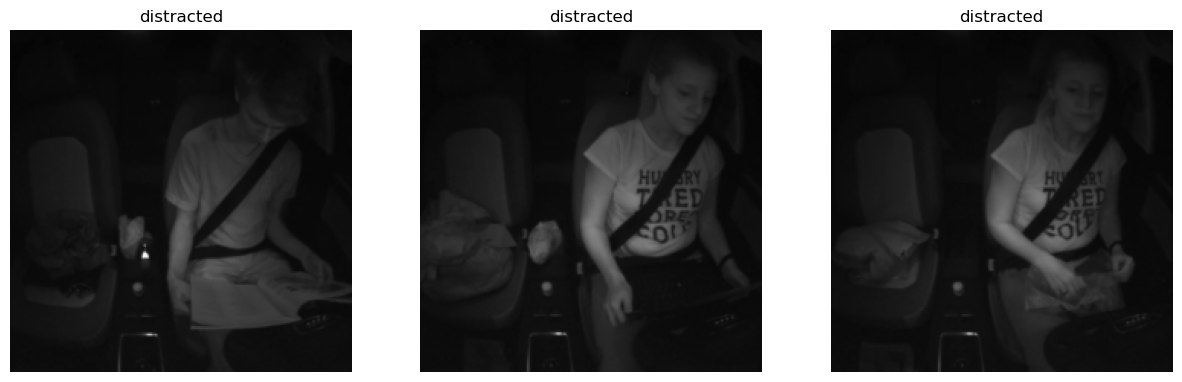

In [32]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np

# Set transformation parameters
crop_size = 224
resize_size = 256
mean = [0.485, 0.485, 0.485]  # Uniform mean across channels
std = [0.229, 0.229, 0.229]   # Uniform std deviation across channels
interpolation = InterpolationMode.BILINEAR

# The Lambda transform is not needed, 
# it is used just in case if there is a dataset which contains single channel gray scale images.
# For our use case we already have gray scale images in three channels format.

# Define the transformations
transform = transforms.Compose([
    transforms.Resize(resize_size, interpolation=interpolation),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor(),  # Convert image to tensor before other tensor ops
    transforms.Lambda(lambda x: x if x.size(0) == 3 else x.repeat(3, 1, 1)),  # Conditionally repeat the grayscale channel
    transforms.Normalize(mean=mean, std=std),
    transforms.Lambda(lambda x: x if x.size(0) == 3 else torch.tensor([[],[],[]])) # Check for channel size
])

dataset_path = nir_test_dir

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True, num_workers=0)  # Reduce num_workers for debugging

# Function to plot images
def plot_images(images, labels):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, labels)):
        img = img.numpy().transpose((1, 2, 0))
        img = img * std + mean  # Unnormalize the image using adjusted mean/std for grayscale
        img = np.clip(img, 0, 1)
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

# Visualizing some images
dataiter = iter(dataloader)
images, labels = next(dataiter)
# Convert labels to class names
class_names = dataset.classes
labels = [class_names[label] for label in labels]
plot_images(images, labels)
